In [1]:
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

### Data pre-processing

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This iris DB has three labels. We want to make a binary classification model. So let's just keep two labels: Iris-setosa and Iris-versicolor

In [4]:
iris = iris[:100]

In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


Let's convert String category variables to Integer category variables.

In [6]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


To fit this data in a one layer logistic regression model, the data needs to be linearly separable. Let's see if that's the case.

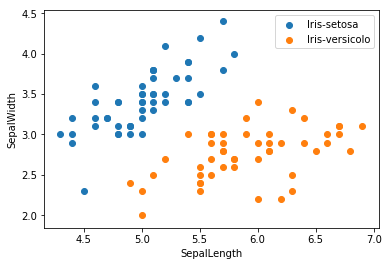

In [9]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

Just keep the columns with features.

In [8]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

In [10]:
X[:10], y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [11]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

Randomly select indexes to use for training.

In [12]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [13]:
train_index

array([ 8, 70, 82, 28, 63,  0,  5, 50, 81,  4, 23, 65, 76, 60, 24, 42, 77,
       38, 56, 75, 35, 88, 19, 29, 31, 91, 85,  9, 53, 41, 21, 90, 33, 69,
       84, 87, 95, 97, 62, 12, 20, 89, 37, 59,  1, 74, 11, 79, 14, 54, 16,
       26, 51, 45,  6, 98, 30, 44, 72, 43, 15, 94, 18, 13, 22, 10, 58, 71,
       64,  3, 40, 34, 27, 52,  7, 48, 61, 93, 99, 39])

In [14]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [16]:
test_index, len(test_index)

(array([32, 96,  2, 66, 36, 67, 68, 73, 46, 47, 78, 17, 49, 80, 83, 86, 55,
        25, 92, 57]), 20)

In [15]:
train_X[:10]

array([[4.4, 2.9, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [5.2, 3.4, 1.4, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [17]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

NameError: name 'min_max_normalized' is not defined

In [ ]:
train_X[:10]

### Building Tensorflow Graph
Let's start building Tensorflow model. Tensorflow is a graph based framework. So we have to build the whole graph of our model before we start any kind of training. For most ML problems, the graph building process is pretty straight forward.

- Step 1: Define placeholders for input Data and Labels.
- Step 2: Pass the Data through layers of Neural Networks.
- Step 3: Define a loss function.
- Step 4: Apply Gradient Descent (or other optimisers) on the loss.

Placeholders are special type of Tensorflow variables. These variables don't hold any particular values and are used as input nodes to the graph. The data is fed to these variables in order to Train the model or infer using the model.

- "data" is used for data input. The shape is Batch Size x Input Features. 
- "labels" is used for output labels. Batch Size x Output Space

To keep the batch size "variable", we use None instead of a specific Batch Size.

In [18]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4], name='Data_Input')
labels = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='Labels_Input')

In [19]:
data

<tf.Tensor 'Data_Input:0' shape=(?, 4) dtype=float32>

In [20]:
data.shape

TensorShape([Dimension(None), Dimension(4)])

Now pass the data through all layers.

In [21]:
labels_size = 1
logits = tf.layers.dense(inputs=data, units=1)

Once we have the logits calculated, lets add the loss operation. Since we're doing logistic regression, the loss function is sigmoid cross entropy.

In [22]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
tf.summary.scalar('loss', loss)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [23]:
learning_rate = 0.0003
batch_size = 10
iter_num = 10000

To train our model, we iterate on the parameter values such that the loss is minimized. To reduce the loss, we have multiple Optimizers available. Let's use Gradient Descent.

In [24]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [25]:
goal = opt.minimize(loss)

Prediction and Accuracy utility operations.

In [26]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(logits), name='Prediction')
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, labels), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct, name='Accuracy')

tf.summary.scalar('accuracy', accuracy)
# End of the definition of the model framework

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [27]:
merged = tf.summary.merge_all()

In [28]:
loss_trace = []
train_acc = []
test_acc = []

### Training / Evaluating the model
Up until now, we have just built the graph of model in Tensorflow. Now we will start trainig and evaluating the model. To use the model:
- Initialise the model.
- To "Train" the model: feed data and labels and process the model till the "goal" operation.
- To "Evaluate" the model: provide data and lables and process till "accuracy" operation.

Initialisation is pretty standard. We get a session object after initialisation and this session object is used to interact with the graph.

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [30]:
train_writer = tf.summary.FileWriter('./logistic_regression', sess.graph)

To train the model:
- Get a batch of data and labels.
- Feed data and labels to the graph.
- Check the Train and Test data accuracy.

In [31]:
# training model
for epoch in range(iter_num):
    
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    
    
    _, summary = sess.run([goal, merged], feed_dict={data: batch_train_X, labels: batch_train_y})
    
    
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, labels: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    
    train_logit, train_pred, train_corr = sess.run([logits, prediction, correct],
                                                   feed_dict={data: test_X, labels: np.matrix(test_y).T})

    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, labels: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, labels: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_writer.add_summary(summary, epoch)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.789820 train_acc: 0.162500 test_acc: 0.200000
epoch:  600 loss: 0.680370 train_acc: 0.387500 test_acc: 0.550000
epoch:  900 loss: 0.665513 train_acc: 0.462500 test_acc: 0.550000
epoch: 1200 loss: 0.660854 train_acc: 0.512500 test_acc: 0.650000
epoch: 1500 loss: 0.648728 train_acc: 0.750000 test_acc: 0.850000
epoch: 1800 loss: 0.591346 train_acc: 0.975000 test_acc: 1.000000
epoch: 2100 loss: 0.554238 train_acc: 1.000000 test_acc: 1.000000
epoch: 2400 loss: 0.533576 train_acc: 1.000000 test_acc: 1.000000
epoch: 2700 loss: 0.522295 train_acc: 1.000000 test_acc: 1.000000
epoch: 3000 loss: 0.506395 train_acc: 1.000000 test_acc: 1.000000
epoch: 3300 loss: 0.489543 train_acc: 1.000000 test_acc: 1.000000
epoch: 3600 loss: 0.462715 train_acc: 1.000000 test_acc: 1.000000
epoch: 3900 loss: 0.421837 train_acc: 1.000000 test_acc: 1.000000
epoch: 4200 loss: 0.401053 train_acc: 1.000000 test_acc: 1.000000
epoch: 4500 loss: 0.380277 train_acc: 1.000000 test_acc: 1.000000
epoch: 480

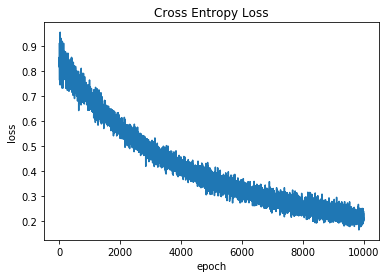

In [32]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

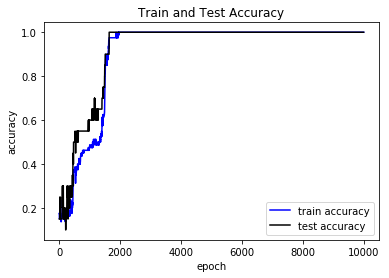

In [33]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()